<a href="https://colab.research.google.com/github/zahrabashir98/Detection-of-Propaganda-Techniques/blob/master/Task_TC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf Detection-of-Propaganda-Techniques
!git clone https://github.com/zahrabashir98/Detection-of-Propaganda-Techniques.git


Cloning into 'Detection-of-Propaganda-Techniques'...
remote: Enumerating objects: 1219, done.
remote: Counting objects: 100% (1219/1219), done.
remote: Compressing objects: 100% (1147/1147), done.
remote: Total 1219 (delta 13), reused 1207 (delta 8), pack-reused 0
Receiving objects: 100% (1219/1219), 1.99 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [0]:
train_folder = "Detection-of-Propaganda-Techniques/datasets/train-articles/"
labels_folders = "Detection-of-Propaganda-Techniques/datasets/train-labels-task2-technique-classification/"
dev_folder = "datasets/dev-articles/"
propaganda_techniques_file = "Detection-of-Propaganda-Techniques/tools/data/propaganda-techniques-names-semeval2020task11.txt/"
task_SI_output_file = "output-CI.txt"

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, GRU
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import backend as K
from keras.callbacks import ModelCheckpoint

import glob
import os
import random
import keras
import tensorflow as tf
import numpy as np



random.seed(10) # to make runs deterministic

Using TensorFlow backend.


In [0]:
def detect_line(article, s, e):
    r = article[s:e]
    line = 0
    for i in range(0,len(article)):

        if i>s:
            return line
        if article[i]=='\n':
            line+=1

type_dict = {'Appeal_to_Authority':0,'Appeal_to_fear-prejudice':1,'Bandwagon,Reductio_ad_hitlerum':2,'Black-and-White_Fallacy':3,'Causal_Oversimplification':4,'Doubt':5,'Exaggeration,Minimisation':6,'Flag-Waving':7,'Loaded_Language':8,'Name_Calling,Labeling':9,'Repetition':10,'Slogans':11,'Thought-terminating_Cliches':12,'Whataboutism,Straw_Men,Red_Herring':13}


train_file_list = glob.glob(os.path.join(train_folder, "*.txt"))
labels_file_list = glob.glob(os.path.join(labels_folders, "*.txt"))
train_list = []
label_list = []
total_lines = 0

for i in train_file_list:
    lines = []
    f = open(i, 'r')
    txt = f.read()
    tmp = txt.split('\n')

    label_addr = labels_folders + i.split('/')[-1].split('.')[0] + '.task2-TC.labels'
    ff = open(label_addr, 'r')
    label_txt = ff.read()
    tmp2 = label_txt.split('\n')
    for k in tmp2:
        if k!='':
            s = int(k.split()[2])
            e = int(k.split()[3])
            lines.append((detect_line(txt, s, e),k.split()[1]))
    # print(lines)
    c=0
    # print(tmp)
    for j in tmp:
        if j!='':
            train_list.append(j)
            flag = True
            for m in lines:
                if c==m[0]:
                    label_list.append(type_dict[m[1]])
                    flag = False
                    break

            if flag:
                label_list.append(14)
        c+=1
print(len(train_list))
# for i in np.array(label_list):
#     print(i)
print(len(np.array(label_list)))
train_list2 = train_list[:]
label_list2 = label_list[:]


16673
16673


In [0]:
tokenizer = Tokenizer(num_words = None, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_{|}~\t\n', lower=True, split=' ')
tokenizer.fit_on_texts(train_list)
sequences = tokenizer.texts_to_sequences(train_list)


# print(train_list[0])
print(sequences)
label_list = to_categorical(label_list)
print(label_list.shape)

[[376, 1785, 2, 2107, 1662, 352], [1926, 178, 1927, 9420, 74, 506, 2528, 4541, 97, 15, 8, 5707, 5061, 4, 5708, 59, 215], [12795, 782, 5, 704, 3, 1, 7619, 9421, 3, 242, 488, 7620, 4542, 5, 7621, 7620, 12796, 5, 734, 14, 120, 14, 1, 6472, 2008, 7, 837, 368, 4, 168, 23, 5709, 39, 12, 3367, 25, 2308, 12, 463, 2, 696, 735, 2, 1, 2529, 1785, 332, 4, 1, 804, 145, 146, 2, 12797, 3861, 1, 12798, 3862, 19, 352, 4, 66, 1572, 7622], [34, 23, 861, 12799, 377, 3367, 1928, 1927, 5710, 624, 712, 258, 1786, 202, 376, 1785, 2, 2107, 1662, 352], [422, 838, 1, 202, 5, 1, 3368, 1929, 3, 1, 3591, 134, 205, 1, 1221, 3863, 4, 12800, 1, 164, 3592, 946, 369, 6473, 7, 1, 47, 205, 25, 1047, 5, 2, 1662, 352], [3367, 8, 105, 4188, 7, 1, 1573, 1785, 377, 37, 302, 2, 18, 1, 4189, 1854, 3, 1, 74, 205, 38, 9422, 8, 67, 388, 101, 3, 1, 2529, 4, 12801, 1785, 4190, 9423, 4190, 51, 1416], [34, 474, 1, 202, 61, 3165, 4, 3369, 85, 274, 479, 2, 1, 5711, 5062, 3, 376, 389, 4191, 4192], [], [376, 1785, 2, 2107, 1662, 352], [19,

In [0]:
# maxlen = max(x_train, key=len)
# print(maxlen)

x_train = sequence.pad_sequences(sequences,dtype=object, padding='post', truncating='post', value=0.0)

y_train = np.array(label_list)
x_data = x_train[:]
y_data = y_train[:]
x_train = x_train[:len(x_train)-20]
y_train = y_train[:len(y_train)-20]

print(y_train[3])
# print(label_list.count(1))
# print(label_list.count(0))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
x_valid = x_data[len(x_data)-100:]
y_valid = y_data[len(y_data)-100:]

print(x_valid.shape)
print(y_valid.shape)

(100, 129)
(100, 15)


In [0]:
def recall(y_true, y_pred):
    """
    Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    """
    Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.

    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))

def create_model(nb_classes, input_shape):
    """Create a MLP model."""
    input_ = Input(shape=input_shape)
    x = input_
    x = Dense(16, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(nb_classes)(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=input_, outputs=x)
    return model

In [0]:
num_word = np.amax(x_train)


def get_LSTM_basic_model():
    model = Sequential()
    model.add(Embedding(num_word+1, 128, input_length=129))
    model.add(Bidirectional(LSTM(64, dropout=.4)))
    # model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))

    model.compile('adam', 'categorical_crossentropy', metrics=["accuracy",f1 ,recall, precision])
    return model

save_dir = os.path.join(os.getcwd())
model_name = 'SimpleLSTM.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]


batch_size = 32
epochs = 10
print(x_train)
m = get_LSTM_basic_model()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))


[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 16653 samples, validate on 100 samples
Epoch 1/10





16653/16653 [==============================] - 260s 16ms/step - loss: 1.1361 - acc: 0.7277 - f1: nan - recall: 0.6756 - precision: 0.7426 - val_loss: 0.8307 - val_acc: 0.8400 - val_f1: 0.8323 - val_recall: 0.7700 - val_precision: 0.9127

Epoch 00001: acc improved from -inf to 0.72774, saving model to /content/SimpleLSTM.001.h5
Epoch 2/10
16653/16653 [==============================] - 258s 15ms/step - loss: 0.9382 - acc: 0.7526 - f1: 0.7551 - recall: 0.6752 - precision: 0.8622 - val_loss: 0.6891 - val_acc: 0.8300 - val_f1

{'val_loss': [0.830704219341278, 0.6891387724876403, 0.5734214127063751, 0.4569348740577698, 0.46541236400604247, 0.3875269460678101, 0.40945724010467527, 0.3110621905326843, 0.2540430974960327, 0.24112651824951173], 'val_acc': [0.84, 0.83, 0.86, 0.88, 0.89, 0.9, 0.9, 0.93, 0.93, 0.95], 'val_f1': [0.8323391914367676, 0.8514464855194092, 0.8856824779510498, 0.9096764278411865, 0.9021618211269379, 0.9122827816009521, 0.9179981899261475, 0.9354210186004639, 0.9517174816131592, 0.9577777767181397], 'val_recall': [0.77, 0.79, 0.85, 0.85, 0.85, 0.87, 0.87, 0.9, 0.92, 0.95], 'val_precision': [0.9126666641235351, 0.9326198267936706, 0.9284102511405945, 0.9866666674613953, 0.9671999931335449, 0.9620512843132019, 0.9763440775871277, 0.9763440775871277, 0.9866666674613953, 0.9666666674613953], 'loss': [1.1360656059175571, 0.9381744500245374, 0.7706984677293569, 0.6139790493819793, 0.47634227277960123, 0.3633526072309534, 0.28522988784666115, 0.2164183034299453, 0.1688124882683392, 0.1411720168896

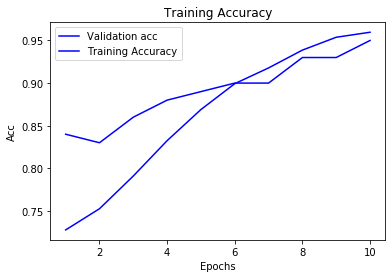

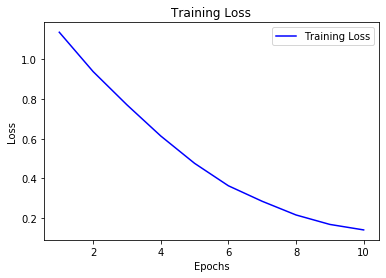

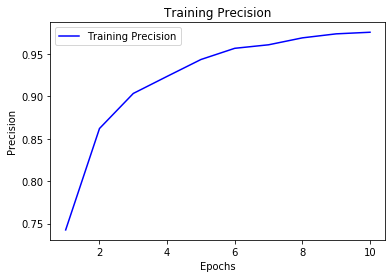

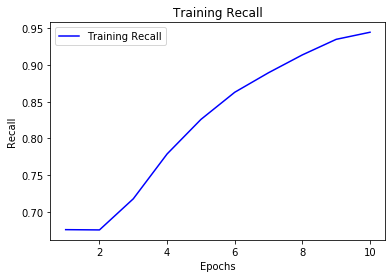

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict)
acc = history_dict['acc']
# print("Final Acc:%s"%(acc[10-1]))
loss = history_dict['loss']
# print("Final Loss:%s"%(loss[10-1]))
prec = history_dict['precision']
# print("Final Precision:%s"%(prec[10-1]))
recall = history_dict['recall']
# print("Final Recall:%s"%(recall[10-1]))


epochs = range(1, len(acc) + 1)
val_acc = history_dict['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [0]:
num_word = np.amax(x_train)

def get_LSTM_basic_model_num2():
    model = Sequential()
    model.add(Embedding(num_word+1, 128, input_length=129))
    model.add(Bidirectional(LSTM( units=128, dropout=.4, return_sequences=True, kernel_initializer='he_normal')))
    model.add(Bidirectional(LSTM( units=128, dropout=.4, kernel_initializer='he_normal')))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(15, activation='softmax', kernel_initializer='he_normal'))
    model.compile('adam', 'categorical_crossentropy', metrics=["accuracy",f1 ,recall, precision])
    model.summary()
    return model

save_dir = os.path.join(os.getcwd())
model_name = '2LSTMs.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

batch_size = 32
epochs = 10
print(x_train)
m = get_LSTM_basic_model_num2()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))

[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 129, 128)          2879872   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 129, 256)          263168    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
____________________________________________________________

Final Acc:0.9310034228067015
Final Loss:0.23350243320595657
Final Precision:0.964854758172209
Final Recall:0.9099261394414946


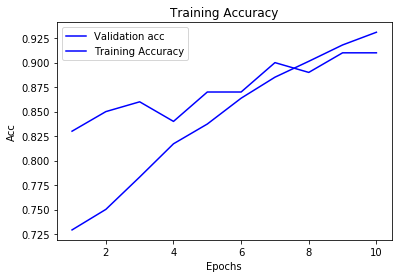

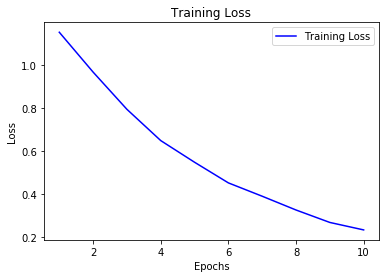

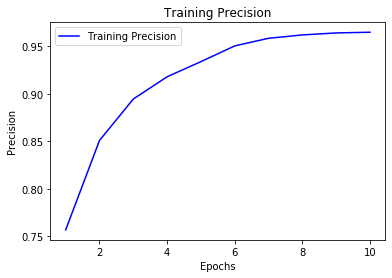

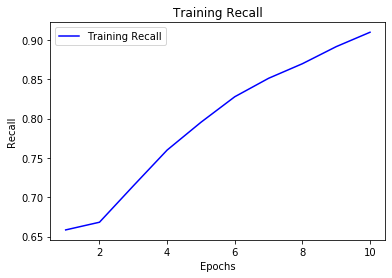

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
# print(history_dict)
acc = history_dict['acc']
print("Final Acc:%s"%(acc[10-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[10-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[10-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[10-1]))


epochs = range(1, len(acc) + 1)
val_acc = history_dict['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [0]:
num_word = np.amax(x_train)

def get_LSTM_basic_model_deep():
    model = Sequential()
    model.add(Embedding(num_word+1, 128, input_length=129))
    model.add(Bidirectional(LSTM(units=128, dropout=.5, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=128, dropout=.5, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=64, dropout=.5, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=64, dropout=.5)))
    # model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(15, activation='softmax', kernel_initializer='he_normal'))
    model.compile('adam', 'categorical_crossentropy',metrics=["accuracy",f1 ,recall, precision])
    model.summary()
    return model

save_dir = os.path.join(os.getcwd())
model_name = '2LSTMs.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

batch_size = 32
epochs = 2
print(x_train)
m = get_LSTM_basic_model_deep()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))

[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 129, 128)          2879872   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 129, 256)          263168    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 129, 256)          394240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 129, 128)          164352    
_________________________________________________________________
bidi

Final Acc:0.7408274785431342
Final Loss:0.9838782501551423
Final Precision:0.8586908146467881
Final Recall:0.6657058788313706


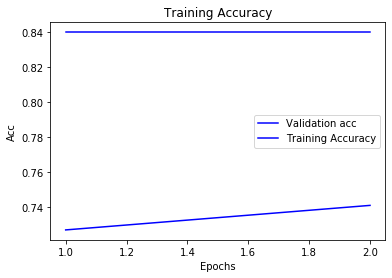

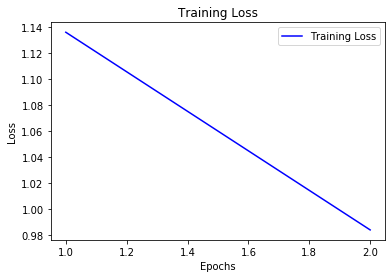

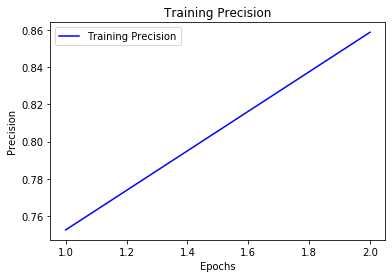

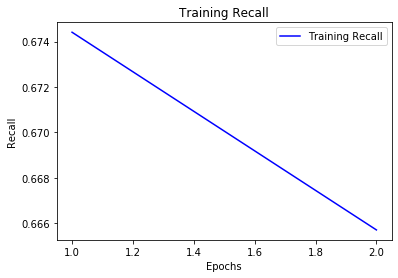

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
# print(history_dict)
acc = history_dict['acc']
print("Final Acc:%s"%(acc[2-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[2-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[2-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[2-1]))


epochs = range(1, len(acc) + 1)
val_acc = history_dict['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [0]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2020-01-27 10:38:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip         61%[===========>        ] 506.85M  2.00MB/s    eta 2m 23s ^C


In [0]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [0]:
num_word = np.amax(x_train)

def get_GRU_basic_model():
    model = Sequential()
    model.add(Embedding(num_word+1, 128, input_length=129))
    model.add(Bidirectional(GRU( units=128, dropout=.4, return_sequences=True, kernel_initializer='he_normal', activation='tanh')))
    model.add(Bidirectional(GRU( units=128, dropout=.4, kernel_initializer='he_normal', activation='tanh')))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(15, activation='softmax', kernel_initializer='he_normal'))
    model.compile('adam', 'categorical_crossentropy', metrics=["accuracy",f1 ,recall, precision])
    model.summary()
    return model

save_dir = os.path.join(os.getcwd())
model_name = '2LSTMs.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

batch_size = 32
epochs = 3
print(x_train)
m = get_GRU_basic_model()
history = m.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid,y_valid))

[[74 2008 24 ... 0.0 0.0 0.0]
 [2812 339 2008 ... 0.0 0.0 0.0]
 [1 2008 339 ... 0.0 0.0 0.0]
 ...
 [1 11322 304 ... 0.0 0.0 0.0]
 [304 293 1092 ... 0.0 0.0 0.0]
 [6 3607 121 ... 0.0 0.0 0.0]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 129, 128)          2879872   
_________________________________________________________________
bidirectional_9 (Bidirection (None, 129, 256)          197376    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 256)               295680    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
____________________________________________________________

Final Acc:0.7831621930089963
Final Loss:0.7842898668451423
Final Precision:0.8975402572015696
Final Recall:0.7151264036653107


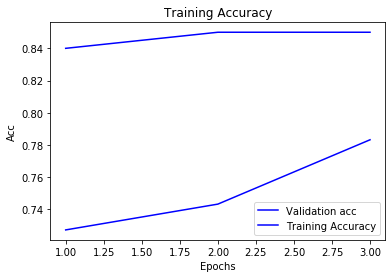

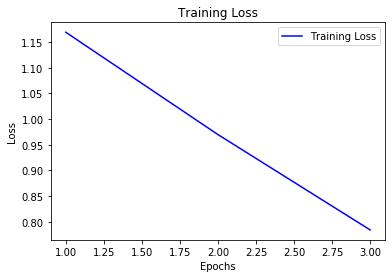

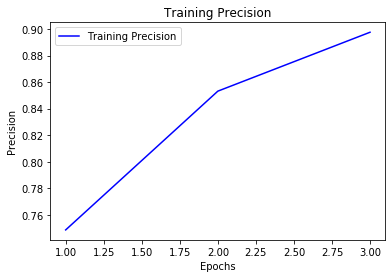

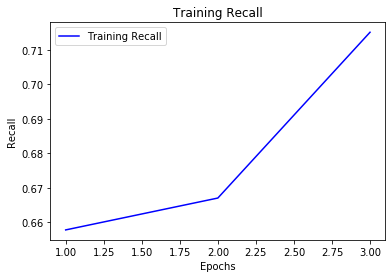

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
# print(history_dict)
acc = history_dict['acc']
print("Final Acc:%s"%(acc[3-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[3-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[3-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[3-1]))


epochs = range(1, len(acc) + 1)
val_acc = history_dict['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [0]:
# !pip install bert-tensorflow

# import tensorflow as tf
# import pandas as pd
# import tensorflow_hub as hub
# import os
# import re
# import numpy as np
# from bert.tokenization import FullTokenizer
# from tqdm import tqdm
# from tensorflow.keras import backend as K

# # Initialize session
# sess = tf.Session()


# # Load all files from a directory in a DataFrame.
# def load_directory_data(directory):
#     data = {}
#     data["sentence"] = []
#     data["sentiment"] = []
#     for file_path in os.listdir(directory):
#         with tf.gfile.GFile(os.path.join(directory, file_path), "r") as f:
#             data["sentence"].append(f.read())
#             data["sentiment"].append(re.match("\d+_(\d+)\.txt", file_path).group(1))
#     return pd.DataFrame.from_dict(data)


# # Merge positive and negative examples, add a polarity column and shuffle.
# def load_dataset(directory):
#     pos_df = load_directory_data(os.path.join(directory, "pos"))
#     neg_df = load_directory_data(os.path.join(directory, "neg"))
#     pos_df["polarity"] = 1
#     neg_df["polarity"] = 0
#     return pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)


# # Download and process the dataset files.
# def download_and_load_datasets(force_download=False):
#     dataset = tf.keras.utils.get_file(
#         fname="aclImdb.tar.gz",
#         origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
#         extract=True,
#     )
#     print(dataset)

#     train_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
#     test_df = load_dataset(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))

#     return train_df, test_df,dataset


# class PaddingInputExample(object):
#     """Fake example so the num input examples is a multiple of the batch size.
#   When running eval/predict on the TPU, we need to pad the number of examples
#   to be a multiple of the batch size, because the TPU requires a fixed batch
#   size. The alternative is to drop the last batch, which is bad because it means
#   the entire output data won't be generated.
#   We use this class instead of `None` because treating `None` as padding
#   battches could cause silent errors.
#   """


# class InputExample(object):
#     """A single training/test example for simple sequence classification."""

#     def __init__(self, guid, text_a, text_b=None, label=None):
#         """Constructs a InputExample.
#     Args:
#       guid: Unique id for the example.
#       text_a: string. The untokenized text of the first sequence. For single
#         sequence tasks, only this sequence must be specified.
#       text_b: (Optional) string. The untokenized text of the second sequence.
#         Only must be specified for sequence pair tasks.
#       label: (Optional) string. The label of the example. This should be
#         specified for train and dev examples, but not for test examples.
#     """
#         self.guid = guid
#         self.text_a = text_a
#         self.text_b = text_b
#         self.label = label


# def create_tokenizer_from_hub_module(bert_path):
#     """Get the vocab file and casing info from the Hub module."""
#     bert_module = hub.Module(bert_path)
#     tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
#     vocab_file, do_lower_case = sess.run(
#         [tokenization_info["vocab_file"], tokenization_info["do_lower_case"]]
#     )

#     return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)


# def convert_single_example(tokenizer, example, max_seq_length=256):
#     """Converts a single `InputExample` into a single `InputFeatures`."""

#     if isinstance(example, PaddingInputExample):
#         input_ids = [0] * max_seq_length
#         input_mask = [0] * max_seq_length
#         segment_ids = [0] * max_seq_length
#         label = 0
#         return input_ids, input_mask, segment_ids, label

#     tokens_a = tokenizer.tokenize(example.text_a)
#     if len(tokens_a) > max_seq_length - 2:
#         tokens_a = tokens_a[0 : (max_seq_length - 2)]

#     tokens = []
#     segment_ids = []
#     tokens.append("[CLS]")
#     segment_ids.append(0)
#     for token in tokens_a:
#         tokens.append(token)
#         segment_ids.append(0)
#     tokens.append("[SEP]")
#     segment_ids.append(0)

#     input_ids = tokenizer.convert_tokens_to_ids(tokens)

#     # The mask has 1 for real tokens and 0 for padding tokens. Only real
#     # tokens are attended to.
#     input_mask = [1] * len(input_ids)

#     # Zero-pad up to the sequence length.
#     while len(input_ids) < max_seq_length:
#         input_ids.append(0)
#         input_mask.append(0)
#         segment_ids.append(0)

#     assert len(input_ids) == max_seq_length
#     assert len(input_mask) == max_seq_length
#     assert len(segment_ids) == max_seq_length

#     return input_ids, input_mask, segment_ids, example.label


# def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
#     """Convert a set of `InputExample`s to a list of `InputFeatures`."""

#     input_ids, input_masks, segment_ids, labels = [], [], [], []
#     for example in tqdm(examples, desc="Converting examples to features"):
#         input_id, input_mask, segment_id, label = convert_single_example(
#             tokenizer, example, max_seq_length
#         )
#         input_ids.append(input_id)
#         input_masks.append(input_mask)
#         segment_ids.append(segment_id)
#         labels.append(label)
#     return (
#         np.array(input_ids),
#         np.array(input_masks),
#         np.array(segment_ids),
#         np.array(labels).reshape(-1, 1),
#     )


# def convert_text_to_examples(texts, labels):
#     """Create InputExamples"""
#     InputExamples = []
#     for text, label in zip(texts, labels):
#         InputExamples.append(
#             InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
#         )
#     return InputExamples


# class BertLayer(tf.keras.layers.Layer):
#     def __init__(
#         self,
#         n_fine_tune_layers=10,
#         pooling="mean",
#         bert_path="https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1",
#         **kwargs,
#     ):
#         self.n_fine_tune_layers = n_fine_tune_layers
#         self.trainable = True
#         self.output_size = 768
#         self.pooling = pooling
#         self.bert_path = bert_path
#         if self.pooling not in ["first", "mean"]:
#             raise NameError(
#                 f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
#             )

#         super(BertLayer, self).__init__(**kwargs)

#     def build(self, input_shape):
#         self.bert = hub.Module(
#             self.bert_path, trainable=self.trainable, name=f"{self.name}_module"
#         )

#         # Remove unused layers
#         trainable_vars = self.bert.variables
#         if self.pooling == "first":
#             trainable_vars = [var for var in trainable_vars if not "/cls/" in var.name]
#             trainable_layers = ["pooler/dense"]

#         elif self.pooling == "mean":
#             trainable_vars = [
#                 var
#                 for var in trainable_vars
#                 if not "/cls/" in var.name and not "/pooler/" in var.name
#             ]
#             trainable_layers = []
#         else:
#             raise NameError(
#                 f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
#             )

#         # Select how many layers to fine tune
#         for i in range(self.n_fine_tune_layers):
#             trainable_layers.append(f"encoder/layer_{str(11 - i)}")

#         # Update trainable vars to contain only the specified layers
#         trainable_vars = [
#             var
#             for var in trainable_vars
#             if any([l in var.name for l in trainable_layers])
#         ]

#         # Add to trainable weights
#         for var in trainable_vars:
#             self._trainable_weights.append(var)

#         for var in self.bert.variables:
#             if var not in self._trainable_weights:
#                 self._non_trainable_weights.append(var)

#         super(BertLayer, self).build(input_shape)

#     def call(self, inputs):
#         inputs = [K.cast(x, dtype="int32") for x in inputs]
#         input_ids, input_mask, segment_ids = inputs
#         bert_inputs = dict(
#             input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
#         )
#         if self.pooling == "first":
#             pooled = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
#                 "pooled_output"
#             ]
#         elif self.pooling == "mean":
#             result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
#                 "sequence_output"
#             ]

#             mul_mask = lambda x, m: x * tf.expand_dims(m, axis=-1)
#             masked_reduce_mean = lambda x, m: tf.reduce_sum(mul_mask(x, m), axis=1) / (
#                     tf.reduce_sum(m, axis=1, keepdims=True) + 1e-10)
#             input_mask = tf.cast(input_mask, tf.float32)
#             pooled = masked_reduce_mean(result, input_mask)
#         else:
#             raise NameError(f"Undefined pooling type (must be either first or mean, but is {self.pooling}")

#         return pooled

#     def compute_output_shape(self, input_shape):
#         return (input_shape[0], self.output_size)


# # Build model
# def build_model(max_seq_length):
#     in_id = tf.keras.layers.Input(shape=(max_seq_length,), name="input_ids")
#     in_mask = tf.keras.layers.Input(shape=(max_seq_length,), name="input_masks")
#     in_segment = tf.keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
#     bert_inputs = [in_id, in_mask, in_segment]

#     bert_output = BertLayer(n_fine_tune_layers=3)(bert_inputs)
#     dense = tf.keras.layers.Dense(256, activation="relu")(bert_output)
#     pred = tf.keras.layers.Dense(1, activation="sigmoid")(dense)

#     model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)
#     model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#     model.summary()

#     return model


# def initialize_vars(sess):
#     sess.run(tf.local_variables_initializer())
#     sess.run(tf.global_variables_initializer())
#     sess.run(tf.tables_initializer())
#     K.set_session(sess)


# def main():
#     # Params for bert model and tokenization
#     bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"
#     max_seq_length = 256

#     train_df, test_df,ds = download_and_load_datasets()
#     # print(train_df)
#     print(ds)
#     # print(test_df)

#     # Create datasets (Only take up to max_seq_length words for memory)
#     train_text = train_df["sentence"].tolist()
#     train_text = [" ".join(t.split()[0:max_seq_length]) for t in train_text]
#     train_text = np.array(train_text, dtype=object)[:, np.newaxis]
#     train_label = train_df["polarity"].tolist()

#     test_text = test_df["sentence"].tolist()
#     test_text = [" ".join(t.split()[0:max_seq_length]) for t in test_text]
#     test_text = np.array(test_text, dtype=object)[:, np.newaxis]
#     test_label = test_df["polarity"].tolist()

#     # Instantiate tokenizer
#     tokenizer = create_tokenizer_from_hub_module(bert_path)

#     # Convert data to InputExample format
#     train_examples = convert_text_to_examples(train_text, train_label)
#     test_examples = convert_text_to_examples(test_text, test_label)

#     # Convert to features
#     (
#         train_input_ids,
#         train_input_masks,
#         train_segment_ids,
#         train_labels,
#     ) = convert_examples_to_features(
#         tokenizer, train_examples, max_seq_length=max_seq_length
#     )
#     (
#         test_input_ids,
#         test_input_masks,
#         test_segment_ids,
#         test_labels,
#     ) = convert_examples_to_features(
#         tokenizer, test_examples, max_seq_length=max_seq_length
#     )

#     model = build_model(max_seq_length)

#     # Instantiate variables
#     initialize_vars(sess)

#     model.fit(
#         [train_input_ids, train_input_masks, train_segment_ids],
#         train_labels,
#         validation_data=(
#             [test_input_ids, test_input_masks, test_segment_ids],
#             test_labels,
#         ),
#         epochs=1,
#         batch_size=32,
#     )


# if __name__ == "__main__":
#     main()

In [0]:
!pip install bert-serving-server  # server
!pip install bert-serving-client  # client, independent of `bert-serving-server`
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 1.1MB 4.1MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=4a6ef79f8aa8bac39b8d985b7c1b9512b2d38e6e787c69b30520c88eb6b28630
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: pyzmq 17.0.0
    Uninstalling pyzmq-17.0.0:
      Successfully uninstalled pyzmq-17.0.0


--2020-01-28 01:23:36--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   230MB/s    in 1.7s    

2020-01-28 01:23:37 (230 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [0]:
! nohup bert-serving-start -model_dir /content/uncased_L-12_H-768_A-12/ -num_worker=1 -cpu -pooling_strategy=NONE -max_seq_len=NONE -show_tokens_to_client &

nohup: appending output to 'nohup.out'


In [0]:
from bert_serving.client import BertClient

bc = BertClient(check_length=False)
# print(train_list2)
tmp = bc.encode(train_list2[:500],show_tokens=False)
print(tmp.shape)


(500, 110, 768)


In [0]:
x_train2 = tmp[:450]
y_train2 = y_train[:450]
x_valid2 = tmp[400:500]
y_valid2 = y_train[400:500]

In [0]:
num_word = np.amax(x_train)

def get_LSTM_with_bert():
    model = Sequential()
    # model.add(Embedding(num_word+1, 128, input_length=129))
    model.add(Bidirectional(GRU( units=128, dropout=.4, return_sequences=True, kernel_initializer='he_normal',input_shape=(None,110,768))))
    model.add(Bidirectional(GRU( units=128, dropout=.4, kernel_initializer='he_normal')))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(15, activation='softmax', kernel_initializer='he_normal'))
    model.compile('adam', 'categorical_crossentropy', metrics=["accuracy",f1 ,recall, precision])
    # model.build((50, 92, 768))
    # model.summary()
    return model

save_dir = os.path.join(os.getcwd())
model_name = '2LSTMs.{epoch:03d}.h5'

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True)

callbacks = [checkpoint]

batch_size = 32
epochs = 10
# print(x_train)
m = get_LSTM_with_bert()
history = m.fit(x_train2, y_train2,
          batch_size=batch_size,
          epochs=epochs, callbacks=callbacks, validation_data=(x_valid2,y_valid2))
m.summary()

Train on 450 samples, validate on 100 samples
Epoch 1/10
450/450 [==============================] - 18s 40ms/step - loss: 1.6887 - acc: 0.6622 - f1: nan - recall: 0.5022 - precision: 0.6288 - val_loss: 1.0211 - val_acc: 0.8100 - val_f1: 0.7921 - val_recall: 0.7800 - val_precision: 0.8045

Epoch 00001: acc improved from -inf to 0.66222, saving model to /content/2LSTMs.001.h5
Epoch 2/10
450/450 [==============================] - 14s 30ms/step - loss: 1.2743 - acc: 0.7044 - f1: 0.6670 - recall: 0.6311 - precision: 0.7093 - val_loss: 0.9218 - val_acc: 0.8100 - val_f1: 0.8100 - val_recall: 0.8100 - val_precision: 0.8100

Epoch 00002: acc improved from 0.66222 to 0.70444, saving model to /content/2LSTMs.002.h5
Epoch 3/10
450/450 [==============================] - 14s 30ms/step - loss: 1.2930 - acc: 0.7044 - f1: 0.6846 - recall: 0.6578 - precision: 0.7181 - val_loss: 1.0279 - val_acc: 0.8100 - val_f1: 0.5989 - val_recall: 0.5000 - val_precision: 0.8000

Epoch 00003: acc did not improve from 0

Final Acc:0.7577777777777778
Final Loss:0.9079437429375119
Final Precision:0.8343426513671875
Final Recall:0.6733333333333333


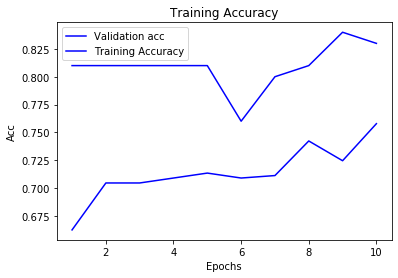

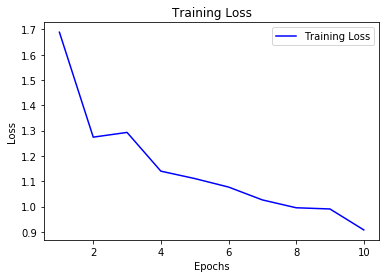

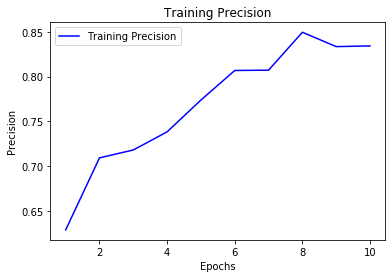

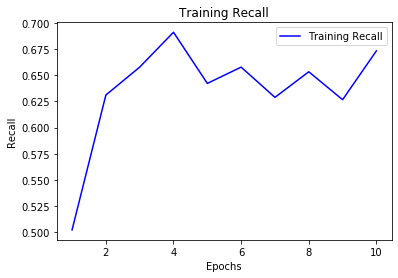

In [0]:
# %matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
# print(history_dict)
acc = history_dict['acc']
print("Final Acc:%s"%(acc[10-1]))
loss = history_dict['loss']
print("Final Loss:%s"%(loss[10-1]))
prec = history_dict['precision']
print("Final Precision:%s"%(prec[10-1]))
recall = history_dict['recall']
print("Final Recall:%s"%(recall[10-1]))


epochs = range(1, len(acc) + 1)
val_acc = history_dict['val_acc']
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, prec, 'b', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.plot(epochs, recall, 'b', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()